# Walmart 데이터 분석

# 프로젝트 개요

이번 프로젝트는 Kaggle의 Walmart 데이터를 분석하는 것을 목적으로 한다. 데이터 전처리와 탐색적 데이터 분석(EDA)을 통해 데이터 분포를 확인하고, 연령대별 고객의 특징을 분석하여 그에 맞는 프로모션 전략을 기획하는 것이 주요 목표다. 이 프로젝트는 데이터의 분포와 주요 특징을 도출하고, 이를 기반으로 효과적인 마케팅 전략을 제안하는 것을 최종 목표로 한다.

## 데이터 설명

데이터 출처: [Walmart 데이터 Kaggle 페이지](https://www.kaggle.com/datasets/devarajv88/walmart-sales-dataset?resource=download)\
데이터 상세: 약 55만개의 사용자 거래 내역과 10개의 특징(550068, 10)
- User_ID: User ID
- Product_ID: Product ID
- Gender: Sex of User
- Age: Age in bins
- Occupation: Occupation(Masked)
- City_Category: Category of the City (A,B,C)
- StayInCurrentCityYears: Number of years stay in current city
- Marital_Status: Marital Status
- ProductCategory: Product Category (Masked)
- Purchase: Purchase Amount

# 데이터 불러오기

In [60]:
import pandas as pd

In [61]:
import matplotlib.pyplot as plt

In [62]:
import seaborn as sns

In [63]:
df = pd.read_csv('c:/githome/hipython_rep/data/walmart.csv')
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


# 데이터 전처리

In [64]:
# 결측치 개수 확인
missing_count = df.isnull().sum()
print("컬럼별 결측치 수:\n", missing_count)

# 결측치 비율 확인
missing_ratio = df.isnull().mean() * 100
print("\n컬럼별 결측치 비율(%):\n", missing_ratio)

컬럼별 결측치 수:
 User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

컬럼별 결측치 비율(%):
 User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64


데이터의 결측치를 확인한 결과, 결측치는 존재하지 않았다. 이에 따라 다음 단계로 이상치 여부를 확인해 보았다.

In [65]:
# IQR 계산
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

# 이상치 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 데이터 추출
outliers = df[(df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)]

print(f"이상치 개수: {len(outliers)}")
print(outliers.head())


이상치 개수: 2677
      User_ID Product_ID Gender    Age  Occupation City_Category  \
343   1000058  P00117642      M  26-35           2             B   
375   1000062  P00119342      F  36-45           3             A   
652   1000126  P00087042      M  18-25           9             B   
736   1000139  P00159542      F  26-35          20             C   
1041  1000175  P00052842      F  26-35           2             B   

     Stay_In_Current_City_Years  Marital_Status  Product_Category  Purchase  
343                           3               0                10     23603  
375                           1               0                10     23792  
652                           1               0                10     23233  
736                           2               0                10     23595  
1041                          1               0                10     23341  


먼저 IQR(사분위수 범위)을 기반으로 이상치 경계를 계산하였다. 1사분위수(Q1)와 3사분위수(Q3)를 구하고, 이 값으로 IQR을 계산한 뒤, 1.5 IQR을 기준으로 이상치 경계인 하한값과 상한값을 도출하였다.

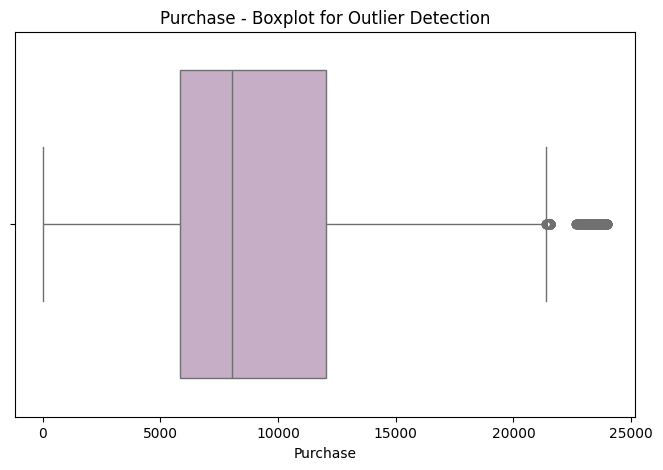

In [66]:
#'Purchase' 컬럼 이상치 확인
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Purchase'], color='#CBAACB')
plt.title('Purchase - Boxplot for Outlier Detection')
plt.show()


Box plot을 사용하여 이상치를 시각적으로 나타냈다.

In [67]:
# IQR 기반 이상치 경계 계산
Q1 = df['Purchase'].quantile(0.25)
Q3 = df['Purchase'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 여부 태그
df['is_outlier'] = ((df['Purchase'] < lower_bound) | (df['Purchase'] > upper_bound)).astype(int)

# clip 처리로 상/하한값으로 이상치 대체
df['Purchase_capped'] = df['Purchase'].clip(lower=lower_bound, upper=upper_bound)

# 결과 확인
print(df[['Purchase', 'Purchase_capped', 'is_outlier']].head())


   Purchase  Purchase_capped  is_outlier
0      8370           8370.0           0
1     15200          15200.0           0
2      1422           1422.0           0
3      1057           1057.0           0
4      7969           7969.0           0


- IQR에서 확인 한 경계를 벗어난 구매 금액에 대해 이상치 여부를 태그하는 is_outlier 컬럼을 생성하였다. 
- 이 컬럼은 이상치일 경우 1, 그렇지 않으면 0으로 표시되도록 하였다. 
- 또한, 이상치로 판단된 값들은 상한값 또는 하한값으로 대체하기 위해 clip 처리를 수행하였으며, clip 처리된 값을 Purchase_capped 컬럼에 저장하였다. 
- 마지막으로 결과를 확인한 출력에서는 샘플 데이터 모두 이상치로 분류되지 않았으며, clip 처리된 값 또한 원래 구매 금액과 동일하게 유지된 것을 확인하였다.

# EDA

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category            550068 non-null  int64  
 9   Purchase                    550068 non-null  int64  
 10  is_outlier                  550068 non-null  int64  
 11  Purchase_capped             550068 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 50.4+ MB


In [69]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase,is_outlier,Purchase_capped
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713,0.004867,9255.024296
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394,0.069592,4999.516285
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000,0.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000,0.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000,0.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000,0.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000,1.000000,21400.500000


## 연령대별 고객 수 

연령대별 고객 수:
Age
0-17      218
18-25    1069
26-35    2053
36-45    1167
46-50     531
51-55     481
55+       372
Name: User_ID, dtype: int64


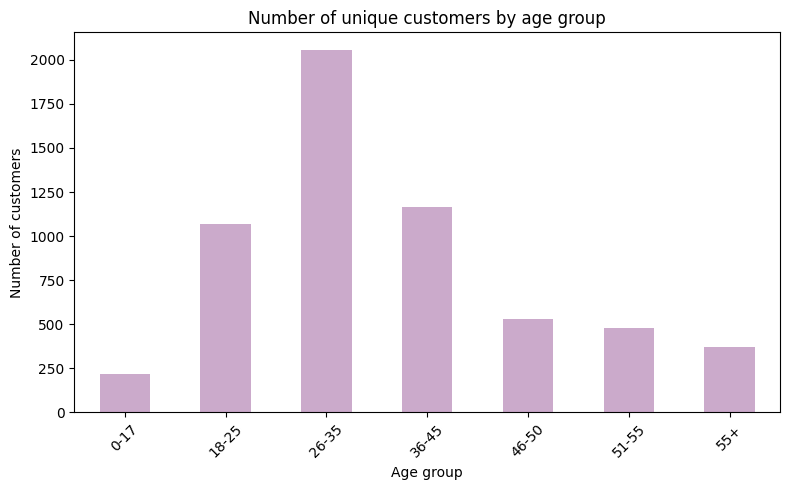

In [70]:
# 연령대별 고객 수 (User_ID 중복 제거)
age_counts = df.groupby('Age')['User_ID'].nunique() # User_ID 중복 제거 → 고유 고객 수 기준

print("연령대별 고객 수:")
print(age_counts)

# 시각화
plt.figure(figsize=(8, 5))
age_counts.plot(kind='bar', color='#CBAACB')
plt.title('Number of unique customers by age group')
plt.ylabel('Number of customers')
plt.xlabel('Age group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 위 그래프는 연령대별 고객 수를 바 그래프로 나타낸 것이다. 
- 26-35세 연령대 고객이 2053명으로 가장 많았으며, 그 뒤를 36-45세와 18-25세 연령대가 이었다.

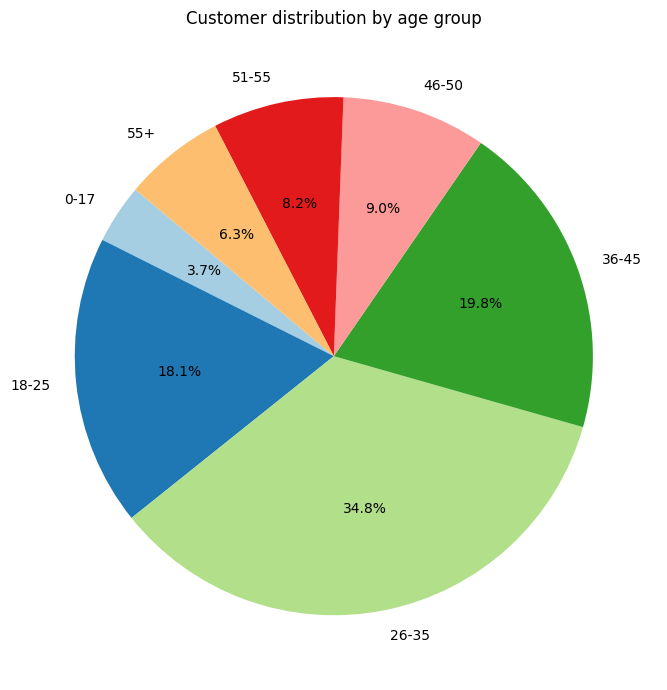

In [71]:
# 연령대별 고유 고객 수
age_counts = df.groupby('Age')['User_ID'].nunique()

# 파이차트 시각화
plt.figure(figsize=(7, 7))
plt.pie(
    age_counts,
    labels=age_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors  # Paired colormap 그대로 사용
)
plt.title('Customer distribution by age group')
plt.tight_layout()
plt.show()

- 파이차트를 통해 고객의 연령대별 비율을 살펴보았다. 
- 파이차트는 바 그래프보다 가장 큰 비율을 차지하는 연령대를 더 쉽고 빠르게 확인할 수 있다는 장점이 있다. 
- 하지만 18-25세와 36-45세처럼 비슷한 비율의 데이터는 % 수치를 보지 않으면 어느 연령대가 더 많은지 직관적으로 구분하기 어렵다는 한계도 있다.

- 앞서 살펴본 결과, 26-35세 연령대의 비율이 가장 높아 이들의 소비 패턴에 맞춘 프로모션이 필요할 것이라는 생각이 들었다. 
- 하지만 Walmart에게는 고객 유치도 중요하지만, 궁극적으로 더 중요한 가치는 매출이라고 볼 수 있다. 
- 26-35세 고객의 수는 많지만 실제로는 큰 소비를 하지 않을 가능성도 있기 때문에, 연령대별 평균 구매금액을 분석해 이를 확인해보고자 한다.

## 연령대별 평균 구매금액 분석

연령대별 평균 구매금액:
Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64


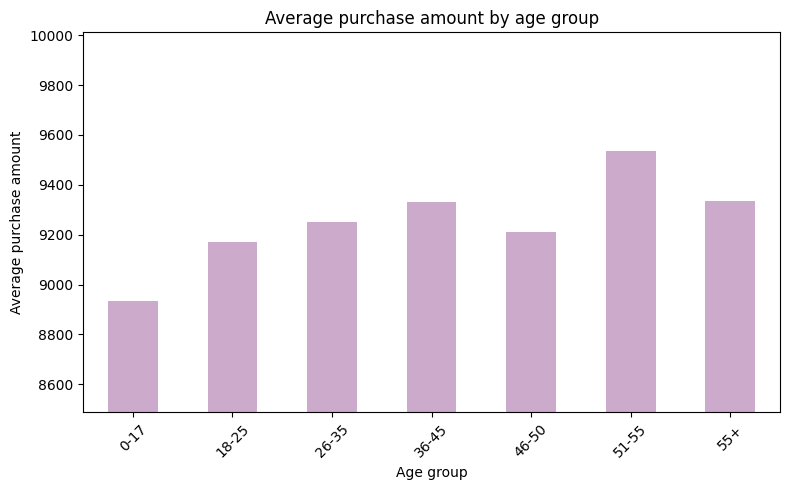

In [72]:
# 연령대별 평균 구매금액 분석
age_purchase = df.groupby('Age')['Purchase'].mean().sort_index()

print("연령대별 평균 구매금액:")
print(age_purchase)

# 시각화
plt.figure(figsize=(8, 5))
ax = age_purchase.plot(kind='bar', color='#CBAACB')
plt.title('Average purchase amount by age group')
plt.ylabel('Average purchase amount')
plt.xlabel('Age group')
plt.xticks(rotation=45)

# y축 범위 조정 (구매금액 min/max 기준 살짝 여유)
min_val = age_purchase.min() * 0.95
max_val = age_purchase.max() * 1.05
plt.ylim(min_val, max_val)

plt.tight_layout()
plt.show()

- 위 그래프는 연령대별 평균 구매금액을 나타낸 것이다. 
- 51-55세 연령대가 평균 9534.81(2.d.p)로 가장 높은 구매금액을 기록했으며, 그 뒤를 55세 이상(9336.28)과 36-45세(9331.35)가 근소한 차이로 이었다. 
- 이 결과만 보면 Walmart는 평균 구매금액이 가장 높은 51-55세를 타겟으로 프로모션을 진행해야 할 것처럼 보인다. 
- 하지만 앞서 살펴본 고객 수에서 51-55세는 481명으로 상대적으로 적은 수를 차지한다. 
- 반면, 고객 수가 가장 많았던 26-35세는 평균 구매금액이 9252.69로 51-55세와 약 300 정도밖에 차이가 나지 않으며, 인원수는 2053명으로 훨씬 많다. 
- 이는 총 매출 측면에서 볼 때 51-55세보다 26-35세를 타겟으로 하는 것이 더 큰 수익을 낼 수 있음을 의미한다. 
- 따라서 이번 프로모션 기획은 가장 많은 고객 수를 가진 26-35세와, 고객 수와 평균 구매금액 모두 높은 36-45세에 초점을 맞추어 진행하고자 한다.

## 카테고리 + 연령대별 구매건수 분석

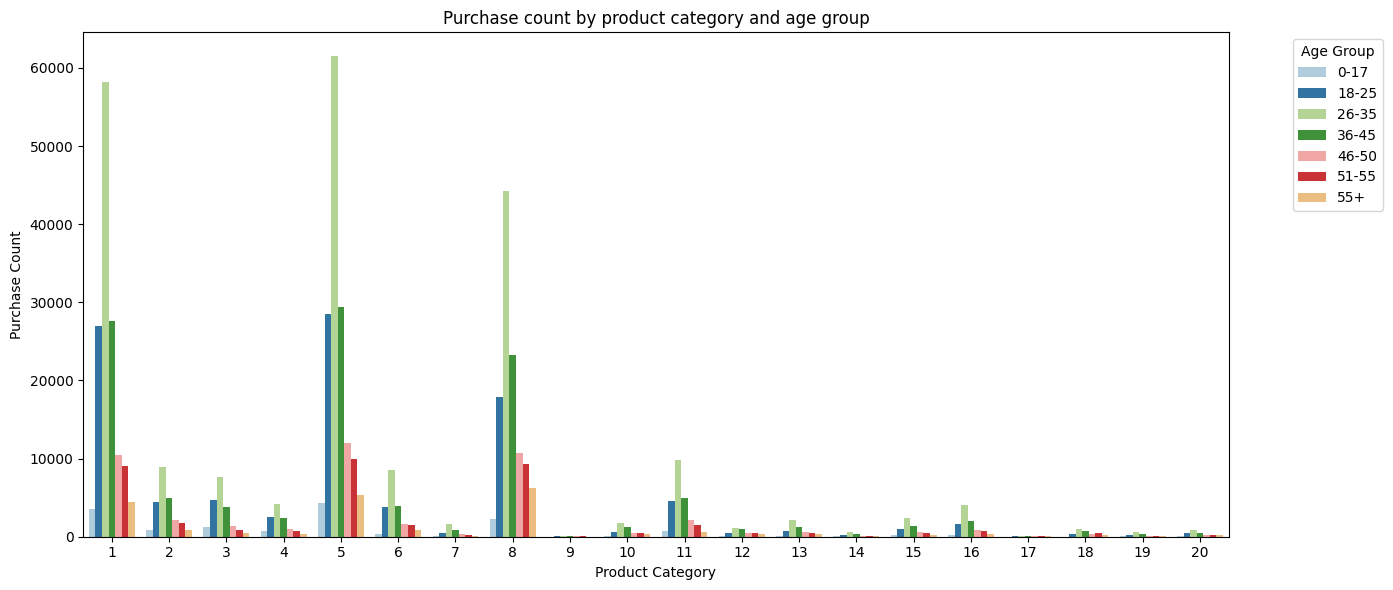

In [73]:
# 카테고리 + 연령대별 구매건수 집계
category_age_counts = df.groupby(['Product_Category', 'Age']).size().reset_index(name='Purchase_Count')

# 시각화
plt.figure(figsize=(14, 6))
sns.barplot(
    data=category_age_counts,
    x='Product_Category',
    y='Purchase_Count',
    hue='Age',
    dodge=True,
    palette='Paired'  # 색상 팔레트 지정
)

plt.title('Purchase count by product category and age group')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


- 위 그래프를 보면 대부분의 연령대가 카테고리 1, 5, 8에 해당하는 제품을 다른 카테고리보다 많이 구매한 것을 확인할 수 있다. 
- 앞서 집중 대상으로 선정한 26-35세와 36-45세 연령대 또한 이 세 카테고리의 제품을 가장 많이 구매하고 있다. 
- 따라서 이번 프로모션은 카테고리 1, 5, 8 제품을 중심으로 기획할 예정이다.

In [74]:
# 카테고리 1, 5, 8 데이터 필터링
target_categories = [1, 5, 8]
df_target = df[df['Product_Category'].isin(target_categories)]

# 카테고리별 평균 구매 금액 계산
avg_purchase = df_target.groupby('Product_Category')['Purchase'].mean().round(2)

print("카테고리 1, 5, 8의 평균 구매 금액:")
print(avg_purchase)


카테고리 1, 5, 8의 평균 구매 금액:
Product_Category
1    13606.22
5     6240.09
8     7498.96
Name: Purchase, dtype: float64


- 위 데이터는 카테고리 1, 5, 8의 평균 구매 금액을 나타낸 것이다. 
- 현재 분석 중인 데이터셋에는 카테고리가 숫자로 표시되어 있어 각 카테고리가 어떤 제품군인지는 알 수 없다. 
- 따라서 각 카테고리의 평균 구매 금액을 기반으로 카테고리 특성을 유추하고, 이를 바탕으로 프로모션을 기획하고자 한다.

# 인사이트 도출

1. 연령대별 구매력 차이
- 분석 결과, 26-35세 연령대는 전체 고객 중 비율이 가장 높았으며, 평균 구매금액도 다른 연령대에 비해 높은 편이었다. 이는 이 연령대가 주요 타겟층임을 보여주며, 중저가 제품군에 대한 맞춤형 프로모션 전략이 효과적일 것으로 판단된다.

2. 카테고리별 선호
- 대부분의 연령대는 카테고리 1, 5, 8 제품에 대한 구매 비중이 높게 나타났다. 각 카테고리의 상세 품목은 알 수 없으나, 해당 카테고리 중심으로 프로모션을 기획하면 폭넓은 고객층의 반응을 이끌어낼 수 있을 것으로 예상된다.

3. 이상치 (고액 구매)의 전략적 활용
- 고액 구매 이상치는 소수 고객에게서 발견되었으며, 이는 VIP 고객군으로 별도 관리할 필요가 있음을 시사한다. 이들을 대상으로 한 프리미엄 상품 할인, 멤버십 리워드 프로그램 등의 전략이 매출 증대에 기여할 수 있다.

**프로모션 전략 방향**
- 대다수 고객 (26-35세, 36-45세): 카테고리 1, 5, 8 중심의 할인 쿠폰, 번들 판매
- 고액 구매 고객: 프리미엄 제품군, 단독 혜택 제공
- 구매 빈도가 낮은 연령대 (0-17세, 55+): 특정 기간 한정 프로모션으로 구매 유도